In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import math

In [2]:
def Inclination(i):
    return np.arccos(i)

def W_mx_correction(i,W_mx):
    return W_mx/np.sin(i)

def abs_magnitude_calc(W_mx):
    abs_mag = -21.39-8.81*(np.log10(W_mx)-2.5)
    return abs_mag

def apparent_correction(ratio,W_mx,I_0):
    return I_0-((0.92+1.63*(np.log10(W_mx)-2.5))*np.log10(ratio))

def Distance_Modulus(apparent, absolute):
    dist = 10**((apparent-absolute+5)/5) #in parsecs
    return dist / (10**6)

In [18]:
file = "tully-fisher-galaxies.csv"
galaxies_df = pd.read_csv(file)
galaxies_df.dropna()
names = galaxies_df['Names']
I_C = galaxies_df['Apparent I Band Magnitude']
W_mx = galaxies_df['Velocity Width']
v = galaxies_df['Radial Velocity']
b_a = galaxies_df['b/a']

Names  Apparent I Band Magnitude  Velocity Width  Radial Velocity   b/a
0        4                      15.02             154             4458  0.22
1       55                      15.13             179             4779  0.30
2       68                      14.09             206             7664  0.59
3       70                      13.57             426             6800  0.14
4       76                      12.71             409             6920  0.40
..     ...                        ...             ...              ...   ...
195   2767                      12.84             251             4138  0.44
196   2769                      14.09             332             9436  0.62
197   2782                      14.34             173             5085  0.65
198   2799                      13.14             152             6375  0.80
199   2805                      13.81             131             1346  0.15

[200 rows x 5 columns]

In [40]:
angle = Inclination(b_a)
W_mx_corrected = W_mx_correction(angle,W_mx)
abs_mag = abs_magnitude_calc(W_mx_corrected)
I_corrected = apparent_correction(b_a**-1,W_mx_corrected,I_C)
distance = Distance_Modulus(I_corrected,abs_mag)

mean = np.mean(distance)
std = np.std(distance,ddof = 1)
Termination = len(distance)
count = 0
distance_new = []
while count < Termination:
    if distance[count] > mean + (2*std):
        print(distance[count])
        print(count)
        #distance.drop(labels = count, axis = 0,inplace=True)
        distance = distance.drop(labels = count,axis = 0)
        #count -= 1
        #Termination -=1
    if  distance[count] < mean - (2*std): #Try to incorporate this into top if statement
        distance = distance.drop(labels = int(count),axis = 0)
        #count -= 1
        #Termination -=1
    count += 1
    
#for i in range(len(distance)):
    #if distance[i] > mean + (2*std) and distance[i] > mean - (2*std):
        #distance_new.append(distance[i])
    #print(distance_new)

141.57524818417934
28


KeyError: 28

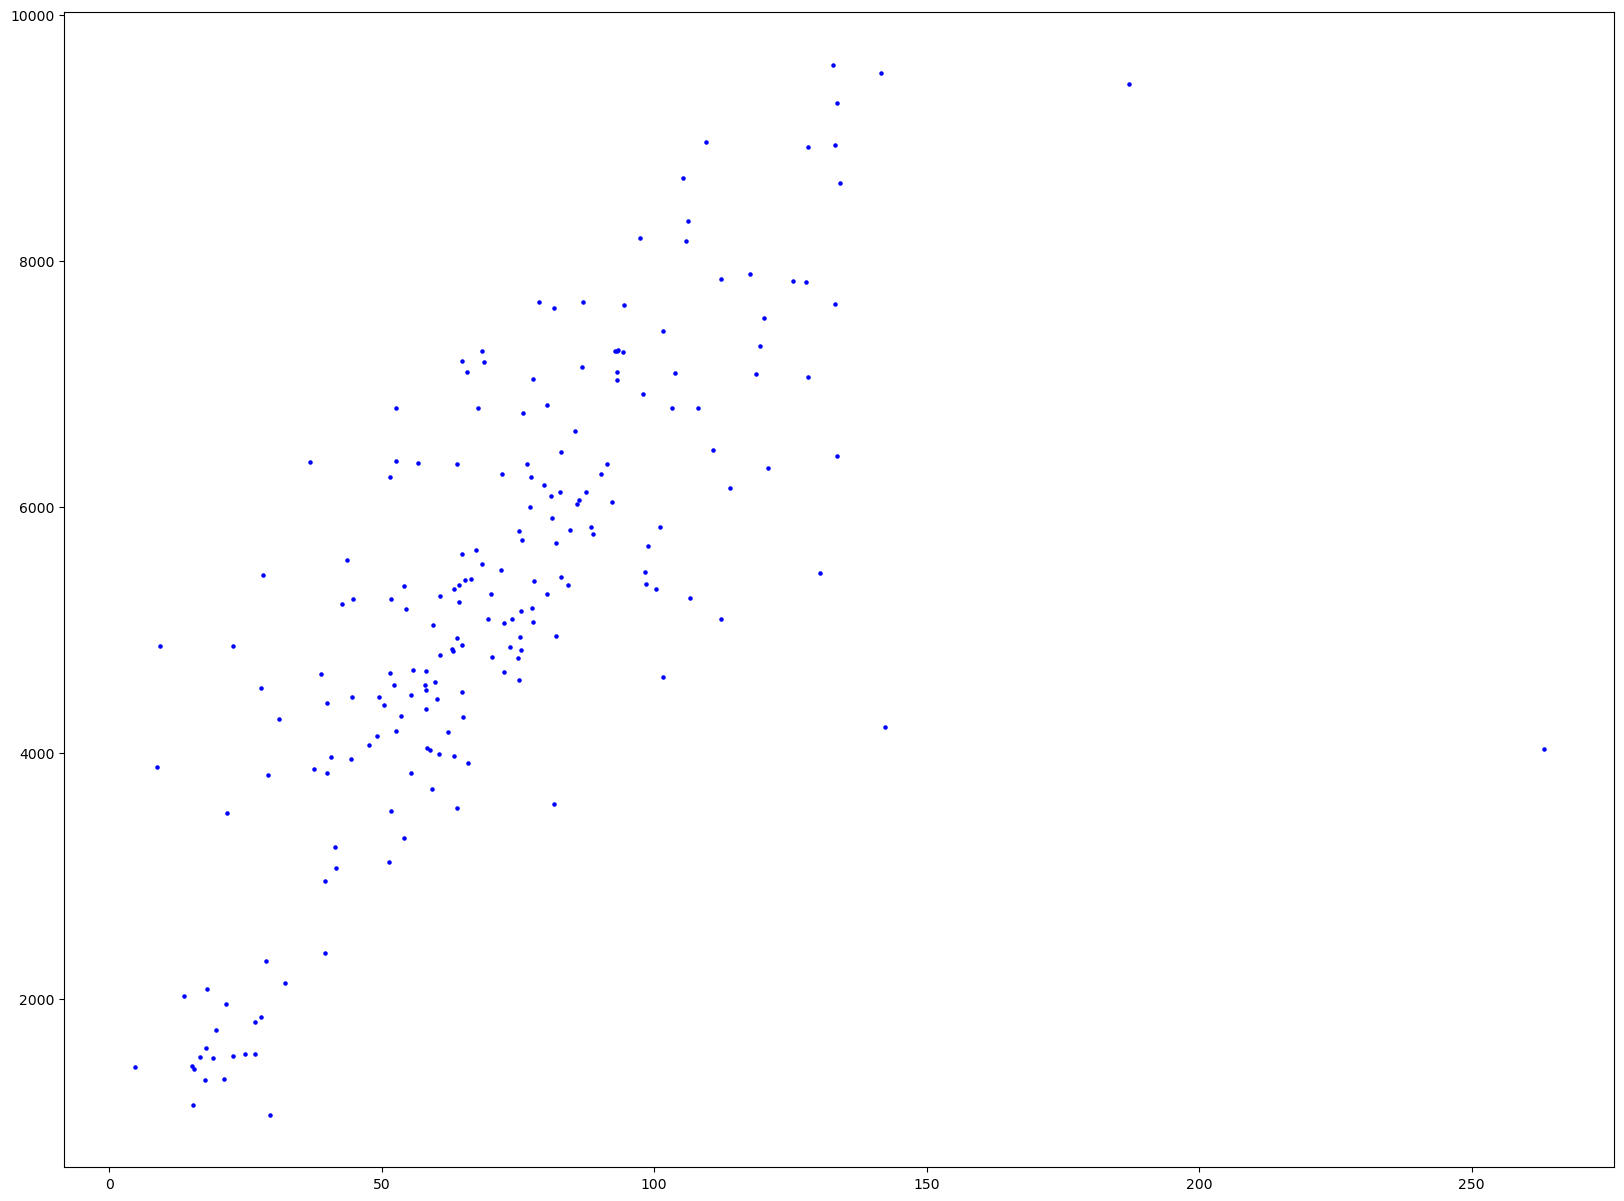

In [14]:
plt.figure(figsize = [20,15])
plt.scatter(distance,v,s=5,c='blue')
plt.show()

In [37]:
#Test thing
test = distance
display(test)
count = 28
test = test.drop(labels = count,axis = 0)
display(test)
print(distance[28])

0       49.439698
1       70.313596
2       78.802747
3      107.959712
4       97.935512
          ...    
195     49.224320
196    187.116678
197     73.924964
198     52.664392
199     21.096547
Length: 200, dtype: float64

0       49.439698
1       70.313596
2       78.802747
3      107.959712
4       97.935512
          ...    
195     49.224320
196    187.116678
197     73.924964
198     52.664392
199     21.096547
Length: 199, dtype: float64

141.57524818417934
